In [1]:
import numpy as np
from uncertainties import ufloat #All numbers with Gaussian error-propagation are treated as ufloat for automation of error propagation.
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# If you do not have the uncertainties package install it
#In order to do that comment in the line below, run it, comment it out again, restart your Kernel
#!pip install --user uncertainties

In [3]:
# Make figures in the paper style
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
matplotlib.rcParams['axes.linewidth'] = 0.75 #set the value globally
matplotlib.rcParams['xtick.major.width'] = 0.75
matplotlib.rcParams['ytick.major.width'] = 0.75
matplotlib.rcParams['axes.labelsize'] = 7
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.labelsize'] = 6
matplotlib.rcParams['ytick.labelsize'] = 6
matplotlib.rcParams['legend.fontsize'] =5
matplotlib.rcParams['pdf.fonttype']=42


matplotlib.rcParams['figure.figsize'] = (3.4908516673585166, 2.327234444905678)
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rc('font', size= 7)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

### Phase-space factors (PSFs) for neutrinoless decays $^{124}$Xe

-  **KI**
       Phys. Rev. C 87 (2013) 057301 (0vECb+, 0vb+b+)
       Phys. Rev. C 89 (2014) 064319 (0vECEC) 

-  **DK**        
       Reference therein **[35]**: Doi M, Kotani T
       "Neutrino emitting of double beta decay",
       Prog Theor Phys. 87 (1992) 1207–31. 

- **SM**
       Reference therein **[39]**: own work by S. Stoica and M. Mirea

In [4]:
G_0vecec = {'SM': None, 
            'KI': 25.7e-20, 
            'DK': None
           }

g0vecec = ufloat(25.7e-20,0)
delta_g0vecec = 0


G_0vecbp = {'SM': 1710e-20, 
            'KI': 1970e-20, 
            'DK': 2290e-20
           }

g0vecbp = np.divide(np.max(np.array([G_0vecbp['SM'],G_0vecbp['KI'],G_0vecbp['DK']]))+np.min(np.array([G_0vecbp['SM'],G_0vecbp['KI'],G_0vecbp['DK']])),2)
delta_g0vecbp = np.divide(np.max(np.array([G_0vecbp['SM'],G_0vecbp['KI'],G_0vecbp['DK']]))-np.min(np.array([G_0vecbp['SM'],G_0vecbp['KI'],G_0vecbp['DK']])),2)
g0vecbp = ufloat(g0vecbp, delta_g0vecbp)


G_0vbpbp = {'SM': 107.8e-20, 
            'KI': 114e-20, 
            'DK': 123e-20
           }

g0vbpbp = np.divide(np.max(np.array([G_0vbpbp['SM'],G_0vbpbp['KI'],G_0vbpbp['DK']]))+np.min(np.array([G_0vbpbp['SM'],G_0vbpbp['KI'],G_0vbpbp['DK']])),2)
delta_g0vbpbp = np.divide(np.max(np.array([G_0vbpbp['SM'],G_0vbpbp['KI'],G_0vbpbp['DK']]))-np.min(np.array([G_0vbpbp['SM'],G_0vbpbp['KI'],G_0vbpbp['DK']])),2)
g0vbpbp = ufloat(g0vbpbp, delta_g0vbpbp)

print('PSF for 0vECEC:',g0vecec)
print('PSF for 0vECb+:',g0vecbp)
print('PSF for 0vb+b+:',g0vbpbp)

PSF for 0vECEC: (2.5700000000000003+/-0)e-19
PSF for 0vECb+: (2.00+/-0.29)e-17
PSF for 0vb+b+: (1.15+/-0.08)e-18


### Nuclear matrix elements (NME) for neutrinoless decays of $^{124}$Xe

- **QRPA**
       Suhonen, J. Phys. G 40 (2013), 075102

-  **IBM** 
       Kotila, Barea, Iachello, Phys. Rev. C 91 (2015), 034304 (0vECb+, 0vb+b+)
       Kotila, Barea, Iachello, Phys. Rev. C 89 (2014), 064319 (0vECEC) 

-  **NSM**        
       Javier Menendez, Personal communication (analogous to Menendez, J. Phys. G 45 (2018) no. 1, 014003)


## Method 1: Direct calculation using existing neutrino mass limits

### What to do with $g_A$?
- **QRPA** 
     
     $g_A=[1,\,1.25]$ are discussed in the paper. 
     However factoring out $g_A$ is not trivial, since the Gamow-Teller and Fermi-Matrix elements themselves differ for $g_A$ (Tab. 2).
     We assume the larger value $g_A=1.25$


- **IBM** 
    
    One has to has to multiply $M=M_x \cdot g_{A,eff}^2$ and $g_{A,eff}=[1.269 \cdot A^{-0.18},\,1.269]$.
    Here one can factorize out $g_A$. 
    As for QRPA we assume an unquenched $g_A = 1.269$.


- **NSM** 
    
    We do not consider $g_A$-quenching in the shell model, as the corresponding effects are accounted for by nuclear correlations


In [5]:
gA_xe124 = {'QRPA': [1, 1.25],
            'IBM': [1.269*(124**(-0.18)), 1.269] #For Xe136 exchange 124 -> 136
           }

In [6]:
M_0vecec = {'QRPA': [1.080,1.298], #range stems from use of different bases and sets of correlations
            'IBM': 0.297 #no uncertainty given in the publication
           }

M_0vecbp = {'QRPA': [4.692,6.617], #range stems from use of different bases and sets of correlations
            'IBM': ufloat(4.74,0.76),
            'NSM': [2.22,4.77]
           }

M_0vbpbp = M_0vecbp



#### Resonance factor and electron mass

In [7]:
#PDG (2018): http://pdg.lbl.gov/2018/listings/rpp2018-list-electron.pdf
me = ufloat(510.9989461, 0.0000031) #keV

# Nesterenko et. al. Phys. Rev. C 86 (2012), 044313
R = ufloat(2.42,0.47) 

#### Helper functions

In [8]:
def plot_loghist(x, nbins=100, histrange=(1,1e32), **kwargs):
    '''Plots a histogram with logarithmic bin size (to make it look nice on a logscale)'''
    hist, bins = np.histogram(x, bins=nbins, range=histrange)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
    plt.hist(x, bins=logbins, range=histrange, **kwargs)
    plt.xscale('log')

### Method 1.1 Use KATRIN 90 % C.L. FC limit on $m_\nu$

In this method we do not use FC on our own and pretend that we do not know the actual parameter distribution that was measured by an experiment that set a limit (this will also be used later with the KamLAND Zen half-life). We sample the parameter distributions of our variables and multiply the samples with the 90 % C.L. upper limit on $m_\nu$ set by KATRIN. Then we obtain the lower limit on the half-life by searching the 10 % quantile of the resulting half-life limit distribution (90 % of limits are stronger).

In [9]:
# 1.1 eV: M. Aker et al. (KATRIN), Phys. Rev. Lett.123, 221802 (2019), 1909.06048
# 0.3 eV: I. Esteban, M.C. Gonzalez-Garcia, A. Hernandez-Cabezudo, M. Maltoni, and T. Schwetz, JHEP 01, 106 (2019)
mnu11 = 1.1e-3 #keV 
mnu03 = 0.3e-3 #keV

#Try uniform distributions where one samples from 10% and 90% of the time?
#For now we use Gaussians
def sample_halflife_mnu(me, mnu, NME, PSF, R=ufloat(1.,0), samples=10000):
    '''Input Gaussian PDFs of all parameters and sample from those. Then make 90% C.L. lower limit.'''

    
    samples_me = np.random.normal(me.nominal_value, me.std_dev, samples)
    samples_NME = np.random.normal(NME.nominal_value, NME.std_dev, samples)
    samples_PSF = np.random.normal(PSF.nominal_value, PSF.std_dev, samples)
    samples_R = np.random.normal(R.nominal_value, R.std_dev, samples)
    
    halflives = np.divide(1,np.multiply(np.power(samples_NME,2),np.multiply(samples_PSF, np.multiply(np.divide(np.power(mnu,2),np.power(samples_me,2)), samples_R))))
    
    #sample from distribution of each parameter and calculate half-life for each sample
    #Find 90% lower limit from ensemble
    return halflives 

## 0$\nu$ECEC

In [10]:
#QRPA at gA=1.25

m0vecec_qrpa=np.mean(M_0vecec['QRPA'])
delta_m0vecec_qrpa=np.std(M_0vecec['QRPA'])

m0vecec_qrpa = ufloat(m0vecec_qrpa,delta_m0vecec_qrpa)

T_0vecec_qrpa = np.divide(1,np.multiply((m0vecec_qrpa**2) * (g0vecec) * R * ((1/me)**2), np.power(mnu11,2)))

print('Half-life range for QRPA at gA=1.25:', T_0vecec_qrpa, '\n')

#IBM at gA=1.269
m0vecec_ibm = ufloat(M_0vecec['IBM']*(np.max(gA_xe124['IBM'])**2),0)

T_0vecec_ibm = np.divide(1,np.multiply((m0vecec_ibm**2) * (g0vecec) * R * ((1/me)**2), np.power(mnu11,2)))

print('Half-life range for IBM at gA=1.269:', T_0vecec_ibm, '\n')


Half-life range for QRPA at gA=1.25: (2.5+/-0.7)e+29 

Half-life range for IBM at gA=1.269: (1.52+/-0.29)e+30 



#### QRPA and IBM for $m_\nu < 1.1\,\text{eV}$

[1.79640774e+29 2.48687644e+29 3.31169291e+29]
QRPA: 90 % lower limit on half-life= [1.79640774e+29] 

[1.21512175e+30 1.51752643e+30 1.88204984e+30]
IBM: 90 % lower limit on half-life= [1.21512175e+30] 



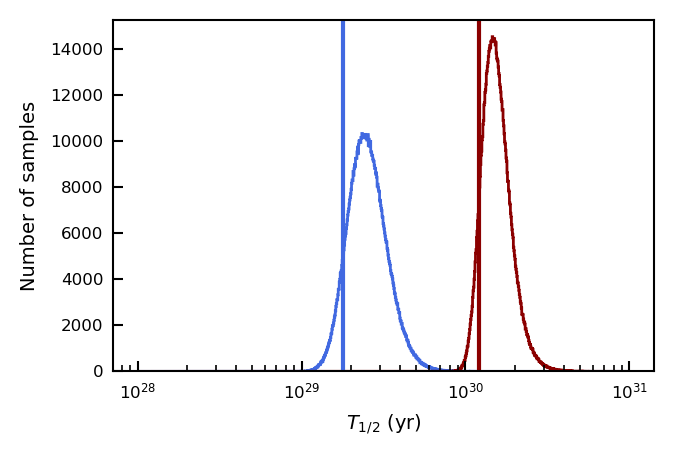

In [11]:
mnu=mnu11

t0vecec_qrpa=sample_halflife_mnu(me, mnu, m0vecec_qrpa, g0vecec, R, 1000000)
lowerlimits_qrpa=np.quantile(t0vecec_qrpa, [0.1,0.5,0.841])
print(lowerlimits_qrpa)
lowerlimit_qrpa=np.quantile(t0vecec_qrpa, [0.1])
print('QRPA: 90 % lower limit on half-life=', lowerlimit_qrpa,'\n')

t0vecec_ibm=sample_halflife_mnu(me, mnu, m0vecec_ibm, g0vecec, R, 1000000)
lowerlimits_ibm=np.quantile(t0vecec_ibm, [0.1,0.5,0.841])
print(lowerlimits_ibm)
lowerlimit_ibm=np.quantile(t0vecec_ibm, [0.1])
print('IBM: 90 % lower limit on half-life=', lowerlimit_ibm,'\n')

plot_loghist(t0vecec_qrpa, 1000, (1e28,1e31), color='royalblue', histtype='step', label='QRPA')
plt.axvline(lowerlimit_qrpa, color='royalblue')

plot_loghist(t0vecec_ibm, 1000, (1e28,1e31), color='darkred', histtype='step', label='IBM')
plt.axvline(lowerlimit_ibm, color='darkred')



plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
#plt.yscale('log')
plt.draw()
plt.show()

#### QRPA and IBM for $m_\nu < 0.3\,\text{eV}$

[2.41523694e+30 3.34372701e+30 4.45151160e+30]
QRPA: 90 % lower limit on half-life= [2.41523694e+30] 

[1.63291512e+31 2.03937490e+31 2.53038033e+31]
IBM: 90 % lower limit on half-life= [1.63291512e+31] 



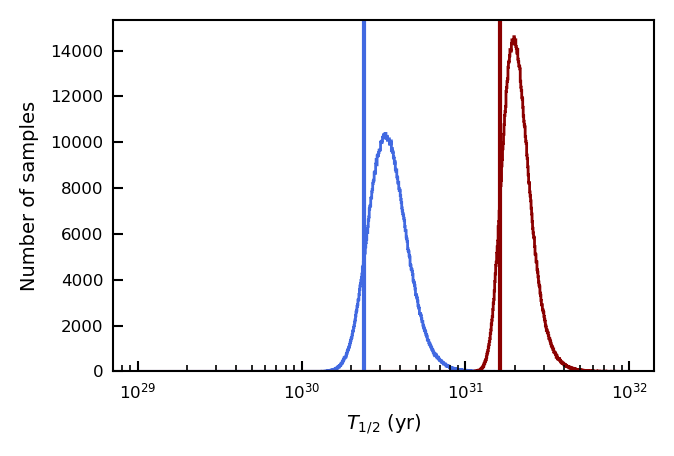

In [12]:
mnu=mnu03

t0vecec_qrpa=sample_halflife_mnu(me, mnu, m0vecec_qrpa, g0vecec, R, 1000000)
lowerlimits_qrpa=np.quantile(t0vecec_qrpa, [0.1,0.5,0.841])
print(lowerlimits_qrpa)
lowerlimit_qrpa=np.quantile(t0vecec_qrpa, [0.1])
print('QRPA: 90 % lower limit on half-life=', lowerlimit_qrpa,'\n')

t0vecec_ibm=sample_halflife_mnu(me, mnu, m0vecec_ibm, g0vecec, R, 1000000)
lowerlimits_ibm=np.quantile(t0vecec_ibm, [0.1,0.5,0.841])
print(lowerlimits_ibm)
lowerlimit_ibm=np.quantile(t0vecec_ibm, [0.1])
print('IBM: 90 % lower limit on half-life=', lowerlimit_ibm,'\n')

plot_loghist(t0vecec_qrpa, 1000, (1e29,1e32), color='royalblue', histtype='step', label='QRPA')
plt.axvline(lowerlimit_qrpa, color='royalblue')

plot_loghist(t0vecec_ibm, 1000, (1e29,1e32), color='darkred', histtype='step', label='IBM')
plt.axvline(lowerlimit_ibm, color='darkred')



plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
#plt.yscale('log')
plt.draw()
plt.show()

## 0$\nu$EC$\beta^+$

In [13]:
#QRPA at gA=1.25
m0vecbp_qrpa=np.mean(M_0vecbp['QRPA'])
delta_m0vecbp_qrpa=np.std(M_0vecbp['QRPA'])

m0vecbp_qrpa = ufloat(m0vecbp_qrpa,delta_m0vecbp_qrpa)

T_0vecbp_qrpa = np.divide(1,np.multiply((m0vecbp_qrpa**2) * (g0vecbp) * ((1/me)**2), np.power(mnu11,2)))

#print('Half-life range for QRPA at gA=1.25:', T_0vecbp_qrpa, '\n')

#IBM at gA=1.269
m0vecbp_ibm = M_0vecbp['IBM']*(np.max(gA_xe124['IBM'])**2)

T_0vecbp_ibm = np.divide(1,np.multiply((m0vecbp_ibm**2) * (g0vecbp) * ((1/me)**2), np.power(mnu11,2)))

#print('Half-life range for IBM at gA=1.269:', T_0vecbp_ibm, '\n')

#NSM
m0vecbp_nsm=np.mean(M_0vecbp['NSM'])
delta_m0vecbp_nsm=np.std(M_0vecbp['NSM'])

m0vecbp_nsm = ufloat(m0vecbp_nsm,delta_m0vecbp_nsm)

T_0vecbp_nsm = np.divide(1,np.multiply((m0vecbp_nsm**2) * (g0vecbp) * ((1/me)**2), np.power(mnu11,2)))

#print('Half-life range for NSM:', T_0vecbp_nsm, '\n')

#### QRPA, IBM and NSM for $m_\nu < 1.1\,\text{eV}$

[8.69637963e+25 1.44333720e+26 2.27223019e+26]
QRPA: 90 % lower limit on half-life= [8.69637963e+25] 

[4.85116662e+25 7.91420402e+25 1.22332451e+26]
IBM: 90 % lower limit on half-life= [4.85116662e+25] 

[1.64191421e+26 3.80756731e+26 9.73581253e+26]
NSM: 90 % lower limit on half-life= [1.64191421e+26] 



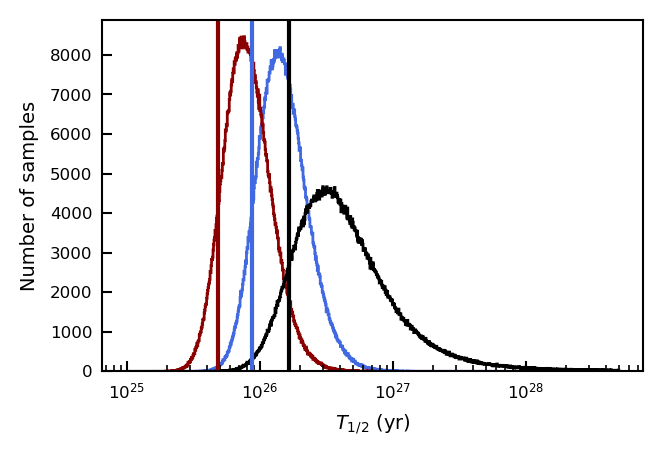

In [14]:
mnu=mnu11

t0vecbp_qrpa=sample_halflife_mnu(me, mnu, m0vecbp_qrpa, g0vecbp, R, 1000000)
lowerlimits_qrpa=np.quantile(t0vecbp_qrpa, [0.1,0.5,0.841])
print(lowerlimits_qrpa)
lowerlimit_qrpa=np.quantile(t0vecbp_qrpa, [0.1])
print('QRPA: 90 % lower limit on half-life=', lowerlimit_qrpa,'\n')

t0vecbp_ibm=sample_halflife_mnu(me, mnu, m0vecbp_ibm, g0vecbp, R, 1000000)
lowerlimits_ibm=np.quantile(t0vecbp_ibm, [0.1,0.5,0.841])
print(lowerlimits_ibm)
lowerlimit_ibm=np.quantile(t0vecbp_ibm, [0.1])
print('IBM: 90 % lower limit on half-life=', lowerlimit_ibm,'\n')

t0vecbp_nsm=sample_halflife_mnu(me, mnu, m0vecbp_nsm, g0vecbp, R, 1000000)
lowerlimits_nsm=np.quantile(t0vecbp_nsm, [0.1,0.5,0.841])
print(lowerlimits_nsm)
lowerlimit_nsm=np.quantile(t0vecbp_nsm, [0.1])
print('NSM: 90 % lower limit on half-life=', lowerlimit_nsm,'\n')



plot_loghist(t0vecbp_qrpa, 1000, (1e25,5e28), color='royalblue', histtype='step', label='QRPA')
plt.axvline(lowerlimit_qrpa, color='royalblue')

plot_loghist(t0vecbp_ibm, 1000, (1e25,5e28), color='darkred', histtype='step', label='IBM')
plt.axvline(lowerlimit_ibm, color='darkred')

plot_loghist(t0vecbp_nsm, 1000, (1e25,5e28), color='black', histtype='step', label='NSM')
plt.axvline(lowerlimit_nsm, color='black')


plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
#plt.yscale('log')
plt.draw()
plt.show()

#### QRPA, IBM and NSM for $m_\nu < 0.3\,\text{eV}$

[1.16876196e+27 1.94169024e+27 3.05587478e+27]
QRPA: 90 % lower limit on half-life= [1.16876196e+27] 

[6.51814312e+26 1.06311775e+27 1.64052271e+27]
IBM: 90 % lower limit on half-life= [6.51814312e+26] 

[2.20720544e+27 5.13394046e+27 1.31155471e+28]
NSM: 90 % lower limit on half-life= [2.20720544e+27] 



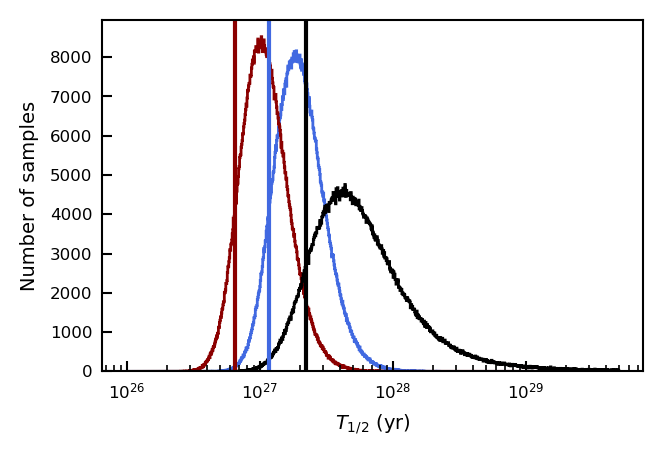

In [15]:
mnu=mnu03

t0vecbp_qrpa=sample_halflife_mnu(me, mnu, m0vecbp_qrpa, g0vecbp, R, 1000000)
lowerlimits_qrpa=np.quantile(t0vecbp_qrpa, [0.1,0.5,0.841])
print(lowerlimits_qrpa)
lowerlimit_qrpa=np.quantile(t0vecbp_qrpa, [0.1])
print('QRPA: 90 % lower limit on half-life=', lowerlimit_qrpa,'\n')

t0vecbp_ibm=sample_halflife_mnu(me, mnu, m0vecbp_ibm, g0vecbp, R, 1000000)
lowerlimits_ibm=np.quantile(t0vecbp_ibm, [0.1,0.5,0.841])
print(lowerlimits_ibm)
lowerlimit_ibm=np.quantile(t0vecbp_ibm, [0.1])
print('IBM: 90 % lower limit on half-life=', lowerlimit_ibm,'\n')

t0vecbp_nsm=sample_halflife_mnu(me, mnu, m0vecbp_nsm, g0vecbp, R, 1000000)
lowerlimits_nsm=np.quantile(t0vecbp_nsm, [0.1,0.5,0.841])
print(lowerlimits_nsm)
lowerlimit_nsm=np.quantile(t0vecbp_nsm, [0.1])
print('NSM: 90 % lower limit on half-life=', lowerlimit_nsm,'\n')



plot_loghist(t0vecbp_qrpa, 1000, (1e26,5e29), color='royalblue', histtype='step', label='QRPA')
plt.axvline(lowerlimit_qrpa, color='royalblue')

plot_loghist(t0vecbp_ibm, 1000, (1e26,5e29), color='darkred', histtype='step', label='IBM')
plt.axvline(lowerlimit_ibm, color='darkred')

plot_loghist(t0vecbp_nsm, 1000, (1e26,5e29), color='black', histtype='step', label='NSM')
plt.axvline(lowerlimit_nsm, color='black')


plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
#plt.yscale('log')
plt.draw()
plt.show()

## 0$\nu\beta^+\beta^+$

In [16]:
#QRPA at gA=1.25
m0vbpbp_qrpa=np.mean(M_0vbpbp['QRPA'])
delta_m0vbpbp_qrpa=np.std(M_0vbpbp['QRPA'])

m0vbpbp_qrpa = ufloat(m0vbpbp_qrpa,delta_m0vbpbp_qrpa)

T_0vbpbp_qrpa = np.divide(1,np.multiply((m0vbpbp_qrpa**2) * (g0vbpbp) * ((1/me)**2), np.power(mnu11,2)))

print('Half-life range for QRPA at gA=1.25:', T_0vbpbp_qrpa, '\n')

#IBM at gA=1.269
m0vbpbp_ibm = M_0vbpbp['IBM']*(np.max(gA_xe124['IBM'])**2)

T_0vbpbp_ibm = np.divide(1,np.multiply((m0vbpbp_ibm**2) * (g0vbpbp) * ((1/me)**2), np.power(mnu11,2)))

print('Half-life range for IBM at gA=1.269:', T_0vbpbp_ibm, '\n')

#NSM
m0vbpbp_nsm=np.mean(M_0vbpbp['NSM'])
delta_m0vbpbp_nsm=np.std(M_0vbpbp['NSM'])

m0vbpbp_nsm = ufloat(m0vbpbp_nsm,delta_m0vbpbp_nsm)

T_0vbpbp_nsm = np.divide(1,np.multiply((m0vbpbp_nsm**2) * (g0vbpbp) * ((1/me)**2), np.power(mnu11,2)))

print('Half-life range for NSM:', T_0vbpbp_nsm, '\n')

Half-life range for QRPA at gA=1.25: (5.8+/-2.0)e+27 

Half-life range for IBM at gA=1.269: (3.2+/-1.1)e+27 

Half-life range for NSM: (1.5+/-1.1)e+28 



#### QRPA, IBM and NSM for $m_\nu < 1.1\,\text{eV}$

[1.53573218e+27 2.47823302e+27 3.81558549e+27]
QRPA: 90 % lower limit on half-life= [1.53573218e+27] 

[8.57490093e+26 1.35784962e+27 2.05141260e+27]
IBM: 90 % lower limit on half-life= [8.57490093e+26] 

[2.87196865e+27 6.53640660e+27 1.65483792e+28]
NSM: 90 % lower limit on half-life= [2.87196865e+27] 



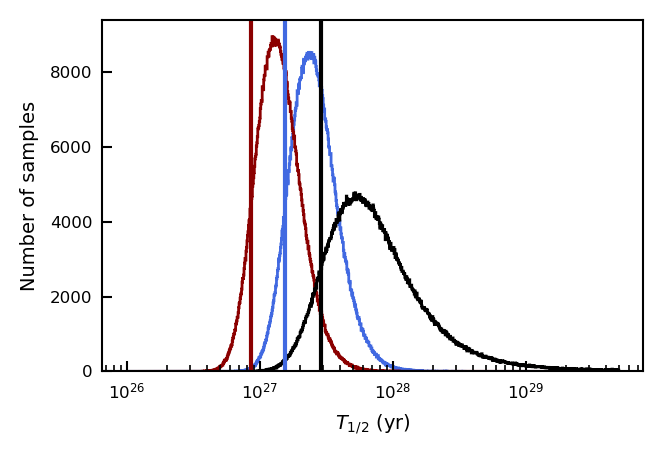

In [17]:
mnu=mnu11

t0vbpbp_qrpa=sample_halflife_mnu(me, mnu, m0vbpbp_qrpa, g0vbpbp, R, 1000000)
lowerlimits_qrpa=np.quantile(t0vbpbp_qrpa, [0.1,0.5,0.841])
print(lowerlimits_qrpa)
lowerlimit_qrpa=np.quantile(t0vbpbp_qrpa, [0.1])
print('QRPA: 90 % lower limit on half-life=', lowerlimit_qrpa,'\n')

t0vbpbp_ibm=sample_halflife_mnu(me, mnu, m0vbpbp_ibm, g0vbpbp, R, 1000000)
lowerlimits_ibm=np.quantile(t0vbpbp_ibm, [0.1,0.5,0.841])
print(lowerlimits_ibm)
lowerlimit_ibm=np.quantile(t0vbpbp_ibm, [0.1])
print('IBM: 90 % lower limit on half-life=', lowerlimit_ibm,'\n')

t0vbpbp_nsm=sample_halflife_mnu(me, mnu, m0vbpbp_nsm, g0vbpbp, R, 1000000)
lowerlimits_nsm=np.quantile(t0vbpbp_nsm, [0.1,0.5,0.841])
print(lowerlimits_nsm)
lowerlimit_nsm=np.quantile(t0vbpbp_nsm, [0.1])
print('NSM: 90 % lower limit on half-life=', lowerlimit_nsm,'\n')



plot_loghist(t0vbpbp_qrpa, 1000, (1e26,5e29), color='royalblue', histtype='step', label='QRPA')
plt.axvline(lowerlimit_qrpa, color='royalblue')

plot_loghist(t0vbpbp_ibm, 1000, (1e26,5e29), color='darkred', histtype='step', label='IBM')
plt.axvline(lowerlimit_ibm, color='darkred')

plot_loghist(t0vbpbp_nsm, 1000, (1e26,5e29), color='black', histtype='step', label='NSM')
plt.axvline(lowerlimit_nsm, color='black')


plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
#plt.yscale('log')
plt.draw()
plt.show()

#### QRPA, IBM and NSM for $m_\nu < 0.3\,\text{eV}$

[2.06445917e+28 3.32855687e+28 5.13958176e+28]
QRPA: 90 % lower limit on half-life= [2.06445917e+28] 

[1.15261064e+28 1.82583788e+28 2.76348358e+28]
IBM: 90 % lower limit on half-life= [1.15261064e+28] 

[3.85559909e+28 8.78224823e+28 2.22145770e+29]
NSM: 90 % lower limit on half-life= [3.85559909e+28] 



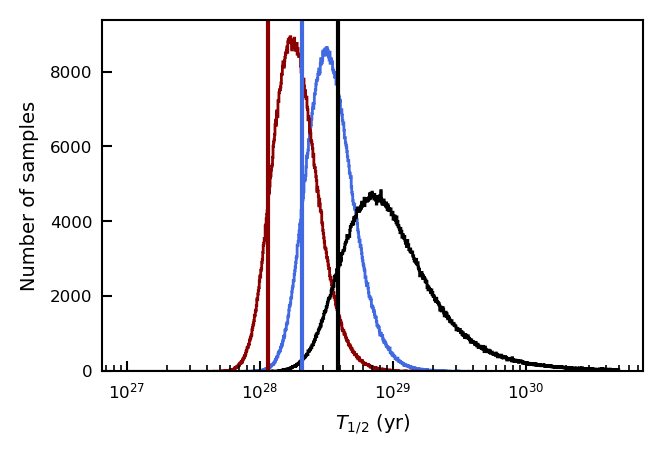

In [18]:
mnu=mnu03

t0vbpbp_qrpa=sample_halflife_mnu(me, mnu, m0vbpbp_qrpa, g0vbpbp, R, 1000000)
lowerlimits_qrpa=np.quantile(t0vbpbp_qrpa, [0.1,0.5,0.841])
print(lowerlimits_qrpa)
lowerlimit_qrpa=np.quantile(t0vbpbp_qrpa, [0.1])
print('QRPA: 90 % lower limit on half-life=', lowerlimit_qrpa,'\n')

t0vbpbp_ibm=sample_halflife_mnu(me, mnu, m0vbpbp_ibm, g0vbpbp, R, 1000000)
lowerlimits_ibm=np.quantile(t0vbpbp_ibm, [0.1,0.5,0.841])
print(lowerlimits_ibm)
lowerlimit_ibm=np.quantile(t0vbpbp_ibm, [0.1])
print('IBM: 90 % lower limit on half-life=', lowerlimit_ibm,'\n')

t0vbpbp_nsm=sample_halflife_mnu(me, mnu, m0vbpbp_nsm, g0vbpbp, R, 1000000)
lowerlimits_nsm=np.quantile(t0vbpbp_nsm, [0.1,0.5,0.841])
print(lowerlimits_nsm)
lowerlimit_nsm=np.quantile(t0vbpbp_nsm, [0.1])
print('NSM: 90 % lower limit on half-life=', lowerlimit_nsm,'\n')



plot_loghist(t0vbpbp_qrpa, 1000, (1e27,5e30), color='royalblue', histtype='step', label='QRPA')
plt.axvline(lowerlimit_qrpa, color='royalblue')

plot_loghist(t0vbpbp_ibm, 1000, (1e27,5e30), color='darkred', histtype='step', label='IBM')
plt.axvline(lowerlimit_ibm, color='darkred')

plot_loghist(t0vbpbp_nsm, 1000, (1e27,5e30), color='black', histtype='step', label='NSM')
plt.axvline(lowerlimit_nsm, color='black')


plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
#plt.yscale('log')
plt.draw()
plt.show()

As we can see in the next section for method 1.2 the limits obtained here are weaker, i.e. at lower half-lives than the ones below. As they are less constraining method 1.1 can be regarded as the more conservative one.

### Method 1.2 Using $m_\nu^2$ measured by KATRIN instead of a limit (This method had an issue, but I think I solved it below.)

We assume $\langle m_\nu\rangle^2 = (-1.0 \pm 1.0)\,\text{eV}^2$ with a symmetrized uncertainty (original KATRIN result is slightly unsymmetric).

As the half-life calculation

$(T^{0\nu}_{1/2})^{-1} = R \cdot G_{0\nu} \cdot |M_{0\nu}|^2 \cdot \frac{|\langle m_\nu \rangle |^2}{m_e^2}$

takes the absolute value of the effective neutrino mass one is "rewarded" with a lower half-life limit if it is negative with a negative uncertainty: The unphysical $|-(1.0\,\text{eV})^2 -(1.1\,\text{eV})^2 |$  is treated effectively as $(2.1\,\text{eV})^2$ neutrino mass yielding a lower half-life. Thus, the half-life distribution will not exhibit negative values and a proper Feldman & Cousins treatment is not possible in the same way it is for the neutrino mass (where one had a Gaussian target distribution physically bounded at 0).

So why is the absolute value of the neutrino mass taken here? I assume that allowing complex phases in the PMNS matrix yields can lead to complex neutrino masses which are taken care of by this.

Can we just not take the absolute value? As KATRIN cannot measure a complex mass the $m_\nu^2$ is real by definition. Also, there are no cancellations. As the lower number from the best-fit PMNS-matrix parameters is also a real number we should be fine with leaving it out.

In [19]:
# This function has an issue. Find those calculations at the end of the notebook
# As it takes the absolute value of the effective neutrino mass one is "rewarded" with a lower half-life limit.
# This is the case because -1.0 eV -1.1 eV is treated effectively as 2.1 eV neutrino mass yielding a lower half-life
# Thus, the half-life distribution will not exhibit negative values and a proper Feldman & Cousins treatment is not
# possible in the same way it is for the neutrino mass.
def sample_halflife_mnusquare(me, mnusquare, NME, PSF, R=ufloat(1.,0), samples=10000):
    '''Input Gaussian PDFs of all parameters and sample from those. Then make 90% C.L. lower limit.'''

    
    samples_me = np.random.normal(me.nominal_value, me.std_dev, samples)
    samples_mnusquare = np.random.normal(mnusquare.nominal_value, mnusquare.std_dev, samples)
    samples_NME = np.random.normal(NME.nominal_value, NME.std_dev, samples)
    samples_PSF = np.random.normal(PSF.nominal_value, PSF.std_dev, samples)
    samples_R = np.random.normal(R.nominal_value, R.std_dev, samples)
    
    #halflives = np.divide(1,np.multiply(np.power(samples_NME,2),np.multiply(samples_PSF, np.multiply(np.divide(np.absolute(samples_mnusquare),np.power(samples_me,2)), samples_R))))
    # Removed absolute value as the neutrino masses used here should be real numbers by definition
    halflives = np.divide(1,np.multiply(np.power(samples_NME,2),np.multiply(samples_PSF, np.multiply(np.divide(samples_mnusquare,np.power(samples_me,2)), samples_R))))
    
    
    #sample from distribution of each parameter and calculate half-life for each sample
    #Find 90% lower limit from ensemble
    return halflives 

We can do a small sanity test of the method. In principle we multiply a 90 % confidence limit with numbers that are smeared around their central value by a probability distribution (here a Gaussian). If they had no uncertainty, we would just shift the limit by those numbers. In the end however we shift the limit by the central value and smear it with the distribution. So in the end, we get a symmetric distribution around the limit we would have gotten if there was no uncertainty. We can in principle take the 10% (90 %) quantile of this distribution and it should roughly correspond to what we get here. In addition the central value should always be less-constraining (larger lower limit or smaller upper limit) than the value we get from the method below.

This means: The half-life limits obtained by our method that draws from the actual $m_\nu^2$ distribution obtained by KATRIN **should always be smaller** than the cental value from the direct calculation without drawing MC samples (i.e. the latter limits are stronger).

We test using the F&C upper limit (not the Lokhov one because it is a different method than we use) on the neutrino mass obtained by KATRIN:

In [20]:
mnufc=0.9e-3 #keV

#We symmetrize the uncertainty here. Actual uncertainty is +0.9 and -1.1
mnu_square_katrin = ufloat(-1.0e-6, 1.0e-6)

#### One more trick: use $(T_{1/2})^{-1}$ to avoid pole at $\langle m_\nu\rangle^2=0$

## 0$\nu$ECEC

In [21]:
#QRPA at gA=1.25

m0vecec_qrpa=np.mean(M_0vecec['QRPA'])
delta_m0vecec_qrpa=np.std(M_0vecec['QRPA'])

m0vecec_qrpa = ufloat(m0vecec_qrpa,delta_m0vecec_qrpa)

T_0vecec_qrpa = np.divide(1,np.multiply((m0vecec_qrpa**2) * (g0vecec) * R * ((1/me)**2), np.power(mnufc,2)))

print('Half-life range for QRPA at gA=1.25:', T_0vecec_qrpa, '\n')

#IBM at gA=1.269
m0vecec_ibm = ufloat(M_0vecec['IBM']*(np.max(gA_xe124['IBM'])**2),0)

T_0vecec_ibm = np.divide(1,np.multiply((m0vecec_ibm**2) * (g0vecec) * R * ((1/me)**2), np.power(mnufc,2)))

print('Half-life range for IBM at gA=1.269:', T_0vecec_ibm, '\n')


Half-life range for QRPA at gA=1.25: (3.7+/-1.0)e+29 

Half-life range for IBM at gA=1.269: (2.3+/-0.4)e+30 



#### QRPA and IBM for $m_\nu < 1.1\,\text{eV}$

QRPA: Mean/Std= -0.933063180327595
IBM: Mean/Std= -0.9650717593748485
QRPA: FC 90% CL upper limit on 1/T= 3.199883832675278e-30
QRPA: FC 90% CL lower limit on T= 3.1251134487714992e+29 

IBM: FC 90% CL upper limit on 1/T= 4.5820352905756946e-31
IBM: FC 90% CL lower limit on T= 2.1824362681291317e+30 



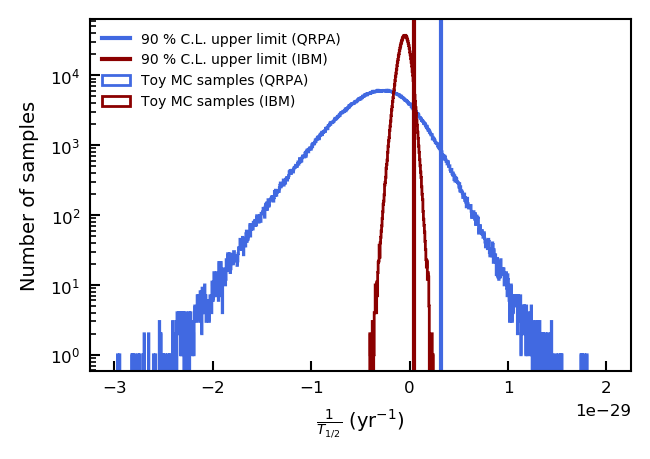

In [22]:
# The squared neutrino mass can become 0. Thus T_1/2 has a pole! => no, the absolute value is taken!
# Calculate the inverse of the half-life in order to avoid hitting the pole

mnu_square=mnu_square_katrin

t0vecec_qrpa=sample_halflife_mnusquare(me, mnu_square, m0vecec_qrpa, g0vecec, R, 1000000)
t0vecec_ibm=sample_halflife_mnusquare(me, mnu_square, m0vecec_ibm, g0vecec, R, 1000000)

plt.hist(1/t0vecec_qrpa, bins=1000, facecolor='royalblue', edgecolor='royalblue', range=(-3e-29,2e-29), 
         label='Toy MC samples (QRPA)', histtype='step')
plt.hist(1/t0vecec_ibm, bins=1000, facecolor='darkred', edgecolor='darkred', range=(-3e-29,2e-29), 
         label='Toy MC samples (IBM)', histtype='step')



#################################
#################################
#################################
#print('Mean:', np.mean(1/t0vecec_qrpa))
#print('Std:', np.std(1/t0vecec_qrpa))
print('QRPA: Mean/Std=', np.mean(1/t0vecec_qrpa)/np.std(1/t0vecec_qrpa))
print('IBM: Mean/Std=', np.mean(1/t0vecec_ibm)/np.std(1/t0vecec_ibm))



upperlimit_qrpa=0.88*np.std(1/t0vecec_qrpa) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_qrpa=1/upperlimit_qrpa
print('QRPA: FC 90% CL upper limit on 1/T=', upperlimit_qrpa) 
print('QRPA: FC 90% CL lower limit on T=', lowerlimit_qrpa, '\n')

upperlimit_ibm=0.81*np.std(1/t0vecec_ibm) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_ibm=1/upperlimit_ibm
print('IBM: FC 90% CL upper limit on 1/T=', upperlimit_ibm) 
print('IBM: FC 90% CL lower limit on T=', lowerlimit_ibm, '\n')

#################################
#################################
#################################

plt.axvline(upperlimit_qrpa, color='royalblue', label=('90 % C.L. upper limit (QRPA)'))
plt.axvline(upperlimit_ibm, color='darkred', label=('90 % C.L. upper limit (IBM)'))


plt.xlabel('$\\frac{1}{T_{1/2}}$ (yr$^{-1}$)')
plt.ylabel('Number of samples')
plt.legend(frameon=False)
plt.yscale('log')
plt.draw()
plt.show()

#### QRPA and IBM for $m_\nu < 0.3\,\text{eV}$

QRPA: Mean/Std= -0.9364513051407942
IBM: Mean/Std= -0.9661777351745191
QRPA: FC 90% CL upper limit on 1/T= 2.3786406917792568e-31
QRPA: FC 90% CL lower limit on T= 4.20408178274284e+30 

IBM: FC 90% CL upper limit on 1/T= 3.399360110114607e-32
IBM: FC 90% CL lower limit on T= 2.941730112748442e+31 



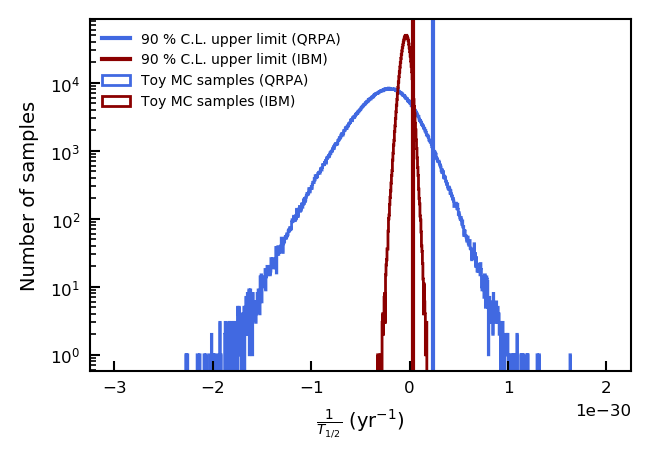

In [23]:
# The squared neutrino mass can become 0. Thus T_1/2 has a pole! => no, the absolute value is taken!
# Calculate the inverse of the half-life in order to avoid hitting the pole

mnu_square=mnu_square_katrin/(1.1/0.3)**2

t0vecec_qrpa=sample_halflife_mnusquare(me, mnu_square, m0vecec_qrpa, g0vecec, R, 1000000)
t0vecec_ibm=sample_halflife_mnusquare(me, mnu_square, m0vecec_ibm, g0vecec, R, 1000000)

plt.hist(1/t0vecec_qrpa, bins=1000, facecolor='royalblue', edgecolor='royalblue', range=(-3e-30,2e-30), 
         label='Toy MC samples (QRPA)', histtype='step')
plt.hist(1/t0vecec_ibm, bins=1000, facecolor='darkred', edgecolor='darkred', range=(-3e-30,2e-30), 
         label='Toy MC samples (IBM)', histtype='step')



#################################
#################################
#################################
#print('Mean:', np.mean(1/t0vecec_qrpa))
#print('Std:', np.std(1/t0vecec_qrpa))
print('QRPA: Mean/Std=', np.mean(1/t0vecec_qrpa)/np.std(1/t0vecec_qrpa))
print('IBM: Mean/Std=', np.mean(1/t0vecec_ibm)/np.std(1/t0vecec_ibm))



upperlimit_qrpa=0.88*np.std(1/t0vecec_qrpa) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_qrpa=1/upperlimit_qrpa
print('QRPA: FC 90% CL upper limit on 1/T=', upperlimit_qrpa) 
print('QRPA: FC 90% CL lower limit on T=', lowerlimit_qrpa, '\n')

upperlimit_ibm=0.81*np.std(1/t0vecec_ibm) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_ibm=1/upperlimit_ibm
print('IBM: FC 90% CL upper limit on 1/T=', upperlimit_ibm) 
print('IBM: FC 90% CL lower limit on T=', lowerlimit_ibm, '\n')

#################################
#################################
#################################

plt.axvline(upperlimit_qrpa, color='royalblue', label=('90 % C.L. upper limit (QRPA)'))
plt.axvline(upperlimit_ibm, color='darkred', label=('90 % C.L. upper limit (IBM)'))


plt.xlabel('$\\frac{1}{T_{1/2}}$ (yr$^{-1}$)')
plt.ylabel('Number of samples')
plt.legend(frameon=False)
plt.yscale('log')
plt.draw()
plt.show()

## 0$\nu$EC$\beta^+$

In [24]:
#QRPA at gA=1.25
m0vecbp_qrpa=np.mean(M_0vecbp['QRPA'])
delta_m0vecbp_qrpa=np.std(M_0vecbp['QRPA'])

m0vecbp_qrpa = ufloat(m0vecbp_qrpa,delta_m0vecbp_qrpa)

T_0vecbp_qrpa = np.divide(1,np.multiply((m0vecbp_qrpa**2) * (g0vecbp) * ((1/me)**2), np.power(mnufc,2)))

#print('Half-life range for QRPA at gA=1.25:', T_0vecbp_qrpa, '\n')

#IBM at gA=1.269
m0vecbp_ibm = M_0vecbp['IBM']*(np.max(gA_xe124['IBM'])**2)

T_0vecbp_ibm = np.divide(1,np.multiply((m0vecbp_ibm**2) * (g0vecbp) * ((1/me)**2), np.power(mnufc,2)))

#print('Half-life range for IBM at gA=1.269:', T_0vecbp_ibm, '\n')

#NSM
m0vecbp_nsm=np.mean(M_0vecbp['NSM'])
delta_m0vecbp_nsm=np.std(M_0vecbp['NSM'])

m0vecbp_nsm = ufloat(m0vecbp_nsm,delta_m0vecbp_nsm)

T_0vecbp_nsm = np.divide(1,np.multiply((m0vecbp_nsm**2) * (g0vecbp) * ((1/me)**2), np.power(mnufc,2)))

#print('Half-life range for NSM:', T_0vecbp_nsm, '\n')

#### QRPA, IBM and NSM for $m_\nu < 1.1\,\text{eV}$

QRPA: Mean/Std= -0.8603622640472345
IBM: Mean/Std= -0.866864083958352
NSM: Mean/Std= -0.697750863344227
QRPA: FC 90% CL upper limit on 1/T= 6.237002115075832e-27
QRPA: FC 90% CL lower limit on T= 1.603334392949523e+26 

IBM: FC 90% CL upper limit on 1/T= 1.1236700006437585e-26
IBM: FC 90% CL lower limit on T= 8.899409964020513e+25 

NSM: FC 90% CL upper limit on 1/T= 1.5804893984204778e-27
NSM: FC 90% CL lower limit on T= 6.327154114411574e+26 



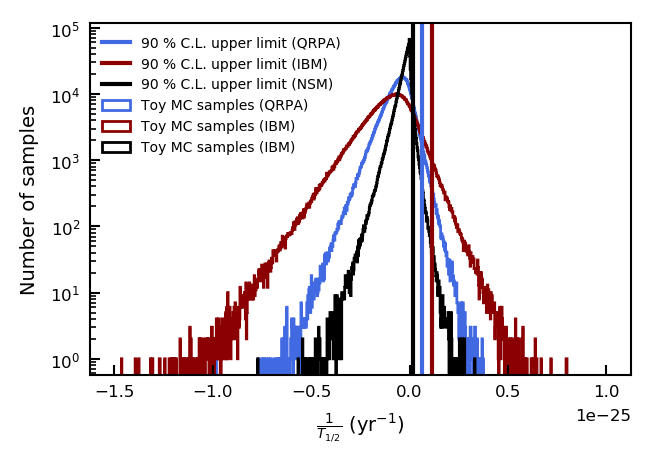

In [25]:
# The squared neutrino mass can become 0. Thus T_1/2 has a pole! => no, the absolute value is taken!
# Calculate the inverse of the half-life in order to avoid hitting the pole

mnu_square=mnu_square_katrin

t0vecbp_qrpa=sample_halflife_mnusquare(me, mnu_square, m0vecbp_qrpa, g0vecbp, R, 1000000)
t0vecbp_ibm=sample_halflife_mnusquare(me, mnu_square, m0vecbp_ibm, g0vecbp, R, 1000000)
t0vecbp_nsm=sample_halflife_mnusquare(me, mnu_square, m0vecbp_nsm, g0vecbp, R, 1000000)



plt.hist(1/t0vecbp_qrpa, bins=1000, facecolor='royalblue', edgecolor='royalblue', range=(-1.5e-25,1e-25), 
         label='Toy MC samples (QRPA)', histtype='step')
plt.hist(1/t0vecbp_ibm, bins=1000, facecolor='darkred', edgecolor='darkred', range=(-1.5e-25,1e-25), 
         label='Toy MC samples (IBM)', histtype='step')
plt.hist(1/t0vecbp_nsm, bins=1000, facecolor='black', edgecolor='black', range=(-1.5e-25,1e-25), 
         label='Toy MC samples (IBM)', histtype='step')




#################################
#################################
#################################
#print('Mean:', np.mean(1/t0vecbp_qrpa))
#print('Std:', np.std(1/t0vecbp_qrpa))
print('QRPA: Mean/Std=', np.mean(1/t0vecbp_qrpa)/np.std(1/t0vecbp_qrpa))
print('IBM: Mean/Std=', np.mean(1/t0vecbp_ibm)/np.std(1/t0vecbp_ibm))
print('NSM: Mean/Std=', np.mean(1/t0vecbp_nsm)/np.std(1/t0vecbp_nsm))




upperlimit_qrpa=0.88*np.std(1/t0vecbp_qrpa) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_qrpa=1/upperlimit_qrpa
print('QRPA: FC 90% CL upper limit on 1/T=', upperlimit_qrpa) 
print('QRPA: FC 90% CL lower limit on T=', lowerlimit_qrpa, '\n')

upperlimit_ibm=0.88*np.std(1/t0vecbp_ibm) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_ibm=1/upperlimit_ibm
print('IBM: FC 90% CL upper limit on 1/T=', upperlimit_ibm) 
print('IBM: FC 90% CL lower limit on T=', lowerlimit_ibm, '\n')

upperlimit_nsm=0.43*np.std(1/t0vecbp_nsm) # For mu/sigma=-0.7 one has mu < [0, 0.43] sigma
lowerlimit_nsm=1/upperlimit_nsm
print('NSM: FC 90% CL upper limit on 1/T=', upperlimit_nsm) 
print('NSM: FC 90% CL lower limit on T=', lowerlimit_nsm, '\n')
#################################
#################################
#################################

plt.axvline(upperlimit_qrpa, color='royalblue', label=('90 % C.L. upper limit (QRPA)'))
plt.axvline(upperlimit_ibm, color='darkred', label=('90 % C.L. upper limit (IBM)'))
plt.axvline(upperlimit_nsm, color='black', label=('90 % C.L. upper limit (NSM)'))



plt.xlabel('$\\frac{1}{T_{1/2}}$ (yr$^{-1}$)')
plt.ylabel('Number of samples')
plt.legend(frameon=False)
plt.yscale('log')
plt.draw()
plt.show()

#### QRPA, IBM and NSM for $m_\nu < 0.3\,\text{eV}$

QRPA: Mean/Std= -0.8583340093485152
IBM: Mean/Std= -0.8669102567182444
NSM: Mean/Std= -0.6960457298109867
QRPA: FC 90% CL upper limit on 1/T= 4.6427600501789915e-28
QRPA: FC 90% CL lower limit on T= 2.153891196598556e+27 

IBM: FC 90% CL upper limit on 1/T= 8.374502517319533e-28
IBM: FC 90% CL lower limit on T= 1.1941007814277603e+27 

NSM: FC 90% CL upper limit on 1/T= 1.1787516774312457e-28
NSM: FC 90% CL lower limit on T= 8.483551023903659e+27 



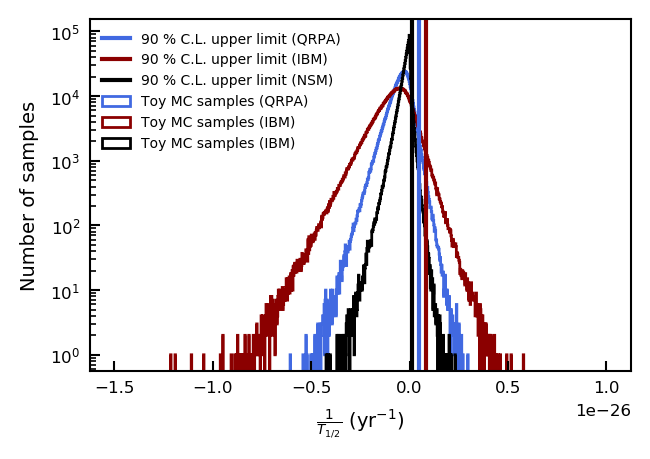

In [26]:
# The squared neutrino mass can become 0. Thus T_1/2 has a pole! => no, the absolute value is taken!
# Calculate the inverse of the half-life in order to avoid hitting the pole

mnu_square=mnu_square_katrin/(1.1/0.3)**2

t0vecbp_qrpa=sample_halflife_mnusquare(me, mnu_square, m0vecbp_qrpa, g0vecbp, R, 1000000)
t0vecbp_ibm=sample_halflife_mnusquare(me, mnu_square, m0vecbp_ibm, g0vecbp, R, 1000000)
t0vecbp_nsm=sample_halflife_mnusquare(me, mnu_square, m0vecbp_nsm, g0vecbp, R, 1000000)



plt.hist(1/t0vecbp_qrpa, bins=1000, facecolor='royalblue', edgecolor='royalblue', range=(-1.5e-26,1e-26), 
         label='Toy MC samples (QRPA)', histtype='step')
plt.hist(1/t0vecbp_ibm, bins=1000, facecolor='darkred', edgecolor='darkred', range=(-1.5e-26,1e-26), 
         label='Toy MC samples (IBM)', histtype='step')
plt.hist(1/t0vecbp_nsm, bins=1000, facecolor='black', edgecolor='black', range=(-1.5e-26,1e-26), 
         label='Toy MC samples (IBM)', histtype='step')




#################################
#################################
#################################
#print('Mean:', np.mean(1/t0vecbp_qrpa))
#print('Std:', np.std(1/t0vecbp_qrpa))
print('QRPA: Mean/Std=', np.mean(1/t0vecbp_qrpa)/np.std(1/t0vecbp_qrpa))
print('IBM: Mean/Std=', np.mean(1/t0vecbp_ibm)/np.std(1/t0vecbp_ibm))
print('NSM: Mean/Std=', np.mean(1/t0vecbp_nsm)/np.std(1/t0vecbp_nsm))




upperlimit_qrpa=0.88*np.std(1/t0vecbp_qrpa) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_qrpa=1/upperlimit_qrpa
print('QRPA: FC 90% CL upper limit on 1/T=', upperlimit_qrpa) 
print('QRPA: FC 90% CL lower limit on T=', lowerlimit_qrpa, '\n')

upperlimit_ibm=0.88*np.std(1/t0vecbp_ibm) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_ibm=1/upperlimit_ibm
print('IBM: FC 90% CL upper limit on 1/T=', upperlimit_ibm) 
print('IBM: FC 90% CL lower limit on T=', lowerlimit_ibm, '\n')

upperlimit_nsm=0.43*np.std(1/t0vecbp_nsm) # For mu/sigma=-0.7 one has mu < [0, 0.43] sigma
lowerlimit_nsm=1/upperlimit_nsm
print('NSM: FC 90% CL upper limit on 1/T=', upperlimit_nsm) 
print('NSM: FC 90% CL lower limit on T=', lowerlimit_nsm, '\n')
#################################
#################################
#################################

plt.axvline(upperlimit_qrpa, color='royalblue', label=('90 % C.L. upper limit (QRPA)'))
plt.axvline(upperlimit_ibm, color='darkred', label=('90 % C.L. upper limit (IBM)'))
plt.axvline(upperlimit_nsm, color='black', label=('90 % C.L. upper limit (NSM)'))



plt.xlabel('$\\frac{1}{T_{1/2}}$ (yr$^{-1}$)')
plt.ylabel('Number of samples')
plt.legend(frameon=False)
plt.yscale('log')
plt.draw()
plt.show()

## 0$\nu\beta^+\beta^+$

In [27]:
#QRPA at gA=1.25
m0vbpbp_qrpa=np.mean(M_0vbpbp['QRPA'])
delta_m0vbpbp_qrpa=np.std(M_0vbpbp['QRPA'])

m0vbpbp_qrpa = ufloat(m0vbpbp_qrpa,delta_m0vbpbp_qrpa)

T_0vbpbp_qrpa = np.divide(1,np.multiply((m0vbpbp_qrpa**2) * (g0vbpbp) * ((1/me)**2), np.power(mnufc,2)))

print('Half-life range for QRPA at gA=1.25:', T_0vbpbp_qrpa, '\n')

#IBM at gA=1.269
m0vbpbp_ibm = M_0vbpbp['IBM']*(np.max(gA_xe124['IBM'])**2)

T_0vbpbp_ibm = np.divide(1,np.multiply((m0vbpbp_ibm**2) * (g0vbpbp) * ((1/me)**2), np.power(mnufc,2)))

print('Half-life range for IBM at gA=1.269:', T_0vbpbp_ibm, '\n')

#NSM
m0vbpbp_nsm=np.mean(M_0vbpbp['NSM'])
delta_m0vbpbp_nsm=np.std(M_0vbpbp['NSM'])

m0vbpbp_nsm = ufloat(m0vbpbp_nsm,delta_m0vbpbp_nsm)

T_0vbpbp_nsm = np.divide(1,np.multiply((m0vbpbp_nsm**2) * (g0vbpbp) * ((1/me)**2), np.power(mnufc,2)))

print('Half-life range for NSM:', T_0vbpbp_nsm, '\n')

Half-life range for QRPA at gA=1.25: (8.7+/-3.0)e+27 

Half-life range for IBM at gA=1.269: (4.8+/-1.6)e+27 

Half-life range for NSM: (2.3+/-1.7)e+28 



#### QRPA, IBM and NSM for $m_\nu < 1.1\,\text{eV}$

QRPA: Mean/Std= -0.8725532829973063
IBM: Mean/Std= -0.8817296885773979
NSM: Mean/Std= -0.7074169258621336
QRPA: FC 90% CL upper limit on 1/T= 3.5486375941209913e-28
QRPA: FC 90% CL lower limit on T= 2.8179828835063196e+27 

IBM: FC 90% CL upper limit on 1/T= 6.388789036991696e-28
IBM: FC 90% CL lower limit on T= 1.5652418544577148e+27 

NSM: FC 90% CL upper limit on 1/T= 9.008201665020049e-29
NSM: FC 90% CL lower limit on T= 1.1100994817679565e+28 



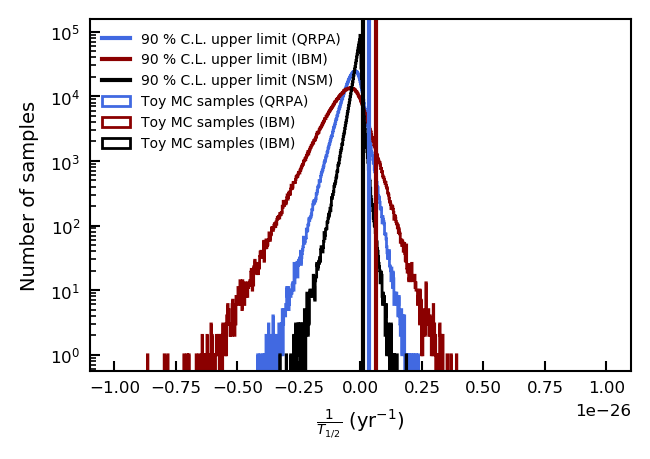

In [28]:
# The squared neutrino mass can become 0. Thus T_1/2 has a pole! => no, the absolute value is taken!
# Calculate the inverse of the half-life in order to avoid hitting the pole

mnu_square=mnu_square_katrin

t0vbpbp_qrpa=sample_halflife_mnusquare(me, mnu_square, m0vbpbp_qrpa, g0vbpbp, R, 1000000)
t0vbpbp_ibm=sample_halflife_mnusquare(me, mnu_square, m0vbpbp_ibm, g0vbpbp, R, 1000000)
t0vbpbp_nsm=sample_halflife_mnusquare(me, mnu_square, m0vbpbp_nsm, g0vbpbp, R, 1000000)



plt.hist(1/t0vbpbp_qrpa, bins=1000, facecolor='royalblue', edgecolor='royalblue', range=(-1e-26,1e-26), 
         label='Toy MC samples (QRPA)', histtype='step')
plt.hist(1/t0vbpbp_ibm, bins=1000, facecolor='darkred', edgecolor='darkred', range=(-1e-26,1e-26), 
         label='Toy MC samples (IBM)', histtype='step')
plt.hist(1/t0vbpbp_nsm, bins=1000, facecolor='black', edgecolor='black', range=(-1e-26,1e-26), 
         label='Toy MC samples (IBM)', histtype='step')




#################################
#################################
#################################
#print('Mean:', np.mean(1/t0vbpbp_qrpa))
#print('Std:', np.std(1/t0vbpbp_qrpa))
print('QRPA: Mean/Std=', np.mean(1/t0vbpbp_qrpa)/np.std(1/t0vbpbp_qrpa))
print('IBM: Mean/Std=', np.mean(1/t0vbpbp_ibm)/np.std(1/t0vbpbp_ibm))
print('NSM: Mean/Std=', np.mean(1/t0vbpbp_nsm)/np.std(1/t0vbpbp_nsm))




upperlimit_qrpa=0.88*np.std(1/t0vbpbp_qrpa) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_qrpa=1/upperlimit_qrpa
print('QRPA: FC 90% CL upper limit on 1/T=', upperlimit_qrpa) 
print('QRPA: FC 90% CL lower limit on T=', lowerlimit_qrpa, '\n')

upperlimit_ibm=0.88*np.std(1/t0vbpbp_ibm) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_ibm=1/upperlimit_ibm
print('IBM: FC 90% CL upper limit on 1/T=', upperlimit_ibm) 
print('IBM: FC 90% CL lower limit on T=', lowerlimit_ibm, '\n')

upperlimit_nsm=0.43*np.std(1/t0vbpbp_nsm) # For mu/sigma=-0.7 one has mu < [0, 0.43] sigma
lowerlimit_nsm=1/upperlimit_nsm
print('NSM: FC 90% CL upper limit on 1/T=', upperlimit_nsm) 
print('NSM: FC 90% CL lower limit on T=', lowerlimit_nsm, '\n')
#################################
#################################
#################################

plt.axvline(upperlimit_qrpa, color='royalblue', label=('90 % C.L. upper limit (QRPA)'))
plt.axvline(upperlimit_ibm, color='darkred', label=('90 % C.L. upper limit (IBM)'))
plt.axvline(upperlimit_nsm, color='black', label=('90 % C.L. upper limit (NSM)'))



plt.xlabel('$\\frac{1}{T_{1/2}}$ (yr$^{-1}$)')
plt.ylabel('Number of samples')
plt.legend(frameon=False)
plt.yscale('log')
plt.draw()
plt.show()

#### QRPA, IBM and NSM for $m_\nu < 0.3\,\text{eV}$

QRPA: Mean/Std= -0.8730989306494777
IBM: Mean/Std= -0.8801883430514391
NSM: Mean/Std= -0.7064267277652443
QRPA: FC 90% CL upper limit on 1/T= 2.642846010567411e-29
QRPA: FC 90% CL lower limit on T= 3.783799721972084e+28 

IBM: FC 90% CL upper limit on 1/T= 4.749713134406555e-29
IBM: FC 90% CL lower limit on T= 2.10539030821899e+28 

NSM: FC 90% CL upper limit on 1/T= 6.691486549426868e-30
NSM: FC 90% CL lower limit on T= 1.4944362401589987e+29 



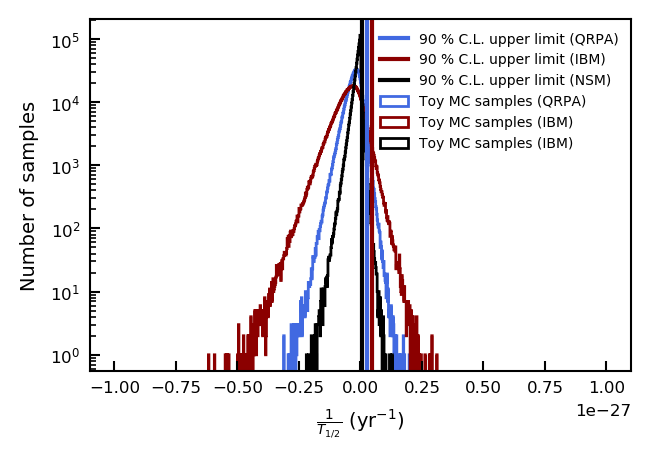

In [29]:
# The squared neutrino mass can become 0. Thus T_1/2 has a pole! => no, the absolute value is taken!
# Calculate the inverse of the half-life in order to avoid hitting the pole

mnu_square=mnu_square_katrin/(1.1/0.3)**2

t0vbpbp_qrpa=sample_halflife_mnusquare(me, mnu_square, m0vbpbp_qrpa, g0vbpbp, R, 1000000)
t0vbpbp_ibm=sample_halflife_mnusquare(me, mnu_square, m0vbpbp_ibm, g0vbpbp, R, 1000000)
t0vbpbp_nsm=sample_halflife_mnusquare(me, mnu_square, m0vbpbp_nsm, g0vbpbp, R, 1000000)



plt.hist(1/t0vbpbp_qrpa, bins=1000, facecolor='royalblue', edgecolor='royalblue', range=(-1e-27,1e-27), 
         label='Toy MC samples (QRPA)', histtype='step')
plt.hist(1/t0vbpbp_ibm, bins=1000, facecolor='darkred', edgecolor='darkred', range=(-1e-27,1e-27), 
         label='Toy MC samples (IBM)', histtype='step')
plt.hist(1/t0vbpbp_nsm, bins=1000, facecolor='black', edgecolor='black', range=(-1e-27,1e-27), 
         label='Toy MC samples (IBM)', histtype='step')




#################################
#################################
#################################
#print('Mean:', np.mean(1/t0vbpbp_qrpa))
#print('Std:', np.std(1/t0vbpbp_qrpa))
print('QRPA: Mean/Std=', np.mean(1/t0vbpbp_qrpa)/np.std(1/t0vbpbp_qrpa))
print('IBM: Mean/Std=', np.mean(1/t0vbpbp_ibm)/np.std(1/t0vbpbp_ibm))
print('NSM: Mean/Std=', np.mean(1/t0vbpbp_nsm)/np.std(1/t0vbpbp_nsm))




upperlimit_qrpa=0.88*np.std(1/t0vbpbp_qrpa) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_qrpa=1/upperlimit_qrpa
print('QRPA: FC 90% CL upper limit on 1/T=', upperlimit_qrpa) 
print('QRPA: FC 90% CL lower limit on T=', lowerlimit_qrpa, '\n')

upperlimit_ibm=0.88*np.std(1/t0vbpbp_ibm) # For mu/sigma=-0.9 one has mu < [0, 0.88] sigma
lowerlimit_ibm=1/upperlimit_ibm
print('IBM: FC 90% CL upper limit on 1/T=', upperlimit_ibm) 
print('IBM: FC 90% CL lower limit on T=', lowerlimit_ibm, '\n')

upperlimit_nsm=0.43*np.std(1/t0vbpbp_nsm) # For mu/sigma=-0.7 one has mu < [0, 0.43] sigma
lowerlimit_nsm=1/upperlimit_nsm
print('NSM: FC 90% CL upper limit on 1/T=', upperlimit_nsm) 
print('NSM: FC 90% CL lower limit on T=', lowerlimit_nsm, '\n')
#################################
#################################
#################################

plt.axvline(upperlimit_qrpa, color='royalblue', label=('90 % C.L. upper limit (QRPA)'))
plt.axvline(upperlimit_ibm, color='darkred', label=('90 % C.L. upper limit (IBM)'))
plt.axvline(upperlimit_nsm, color='black', label=('90 % C.L. upper limit (NSM)'))



plt.xlabel('$\\frac{1}{T_{1/2}}$ (yr$^{-1}$)')
plt.ylabel('Number of samples')
plt.legend(frameon=False)
plt.yscale('log')
plt.draw()
plt.show()

## Method 2: Calculation using measured 90 % C.L. half-life limits for $^{136}$Xe from KamLAND Zen and NME calculations

As only the IBM model allows to easily factor out $g_A$, we illustrate the method on this. We propagate uncertainties in the same fashion as for method 1.1, as we cannot directly derive the KamLAND Zen parameter distribution (no best-fit given, combination of multiple datasets and not all parameters given for each dataset). It could be possible, but would take more time. As we have seen above method 1.1 gives us conservative estimates. Consequently we use it here.

- Publication: KamLAND Zen Collaboration, PRL 117 (2016) 082503


- Half-life limit: $T_{1/2}^{0\nu\beta\beta} > 1.07 \cdot 10^{26}\,\text{yr}$


- Effective neutrino mass limits: $\langle m_\nu \rangle < (0.061 - 0.165)\,\text{eV}$

In [30]:
T_0vbb = 1.07e26 # T_1/2 > 1.07 * 10^26 yr at 90% CL
G_136Xe = ufloat(14.56e-15, 0.02e-15) # mean and std from Kotila, Iachello, PRC 85 (2012), 034316 and Mirea, Stoica, Rep.Phys. 67 (2015)
M_136Xe = {'IBM': 3.05, # IBM-2 without gA_eff**2 from Kotila, Barea, Iachello, PRC91 (2015) 034304
           'NSM': [2.28, 2.45] # NSM from Menendez, J.Phys. G 45 (2018), no. 1, 014003
          } 

### How similar is $g_{\text{A,eff}}$ for A=124 and A=136 for the IBM method?

In [31]:
print('Value for gA_eff(Xe-136): %3.4f' % (1.269*(136**(-0.18))) )
print('Value for gA_eff(Xe-124): %3.4f' % (1.269*(124**(-0.18))) )

print('Ratio of [gA_eff(Xe-124)/gA_eff(Xe-136)]**2: %3.4f' % ( ((1.269*(124**(-0.18)))**2)/((1.269*(136**(-0.18)))**2) ) )

Value for gA_eff(Xe-136): 0.5241
Value for gA_eff(Xe-124): 0.5329
Ratio of [gA_eff(Xe-124)/gA_eff(Xe-136)]**2: 1.0338


In [32]:
def sample_halflife_kamland(mbb, gbb, mec, gec, tbb=1.07e26, R=ufloat(1.,0), samples=10000):
    '''Input Gaussian PDFs of all parameters and sample from those. Then make 90% C.L. lower limit.'''
    
    samples_mbb = np.random.normal(mbb.nominal_value, mbb.std_dev, samples)
    samples_gbb = np.random.normal(gbb.nominal_value, gbb.std_dev, samples)
    samples_mec = np.random.normal(mec.nominal_value, mec.std_dev, samples)
    samples_gec = np.random.normal(gec.nominal_value, gec.std_dev, samples)
    samples_R = np.random.normal(R.nominal_value, R.std_dev, samples)
    
    halflives = np.multiply(np.multiply(np.divide(tbb, samples_R),np.divide(samples_gbb,samples_gec)),np.divide(np.power(samples_mbb,2),np.power(samples_mec,2)))
    #sample from distribution of each parameter and calculate half-life for each sample
    #Find 90% lower limit from ensemble
    return halflives

In [33]:
m0vecec_ibm = ufloat(M_0vecec['IBM'],0)
m0vecbp_ibm = M_0vecbp['IBM']
m0vbpbp_ibm = m0vecbp_ibm

m0vbb_ibm=ufloat(np.mean(M_136Xe['IBM']),np.std(M_136Xe['IBM']))
g0vbb = G_136Xe
#g0vecec
#g0vecbp
#g0vbpbp

## $0\nu\text{ECEC}$

[2.11467116e+32 2.64270287e+32 3.27812017e+32]
IBM: 90 % lower limit on half-life= [2.11467116e+32] 



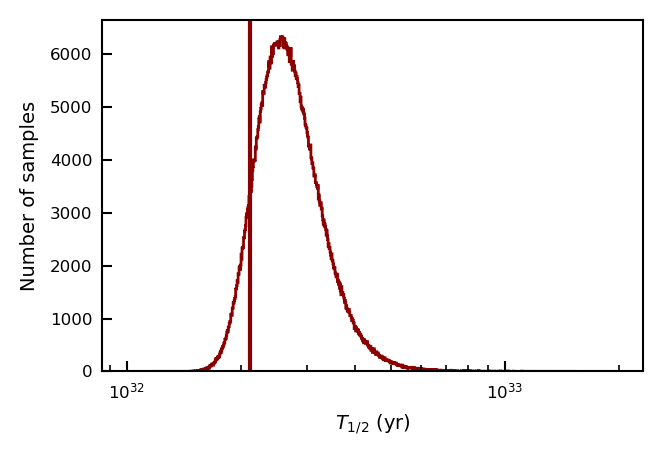

In [34]:
t2_0vecec_ibm = sample_halflife_kamland(m0vbb_ibm, g0vbb, m0vecec_ibm, g0vecec, 1.07e26, R, 1000000)

lowerlimits_ibm=np.quantile(t2_0vecec_ibm, [0.1,0.5,0.841])
print(lowerlimits_ibm)
lowerlimit_ibm=np.quantile(t2_0vecec_ibm, [0.1])
print('IBM: 90 % lower limit on half-life=', lowerlimit_ibm,'\n')

plot_loghist(t2_0vecec_ibm, 1000, (1e32,2e33), color='darkred', histtype='step', label='IBM')
plt.axvline(lowerlimit_ibm, color='darkred')



plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
#plt.yscale('log')
plt.draw()
plt.show()

## $0\nu\text{EC}\beta^+$

[8.44685113e+27 1.37913479e+28 2.13007640e+28]
IBM: 90 % lower limit on half-life= [8.44685113e+27] 



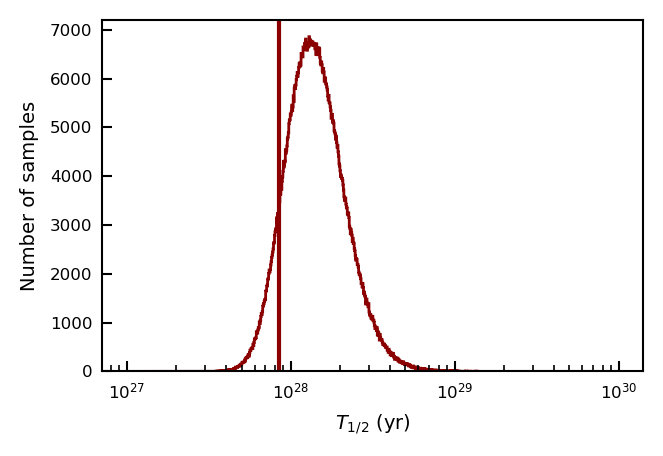

In [35]:
t2_0vecbp_ibm = sample_halflife_kamland(m0vbb_ibm, g0vbb, m0vecbp_ibm, g0vecbp, 1.07e26, R, 1000000)

lowerlimits_ibm=np.quantile(t2_0vecbp_ibm, [0.1,0.5,0.841])
print(lowerlimits_ibm)
lowerlimit_ibm=np.quantile(t2_0vecbp_ibm, [0.1])
print('IBM: 90 % lower limit on half-life=', lowerlimit_ibm,'\n')

plot_loghist(t2_0vecbp_ibm, 1000, (1e27,1e30), color='darkred', histtype='step', label='IBM')
plt.axvline(lowerlimit_ibm, color='darkred')



plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
#plt.yscale('log')
plt.draw()
plt.show()

## $0\nu\beta^+\beta^+$

[1.49414173e+29 2.36610965e+29 3.57337083e+29]
IBM: 90 % lower limit on half-life= [1.49414173e+29] 



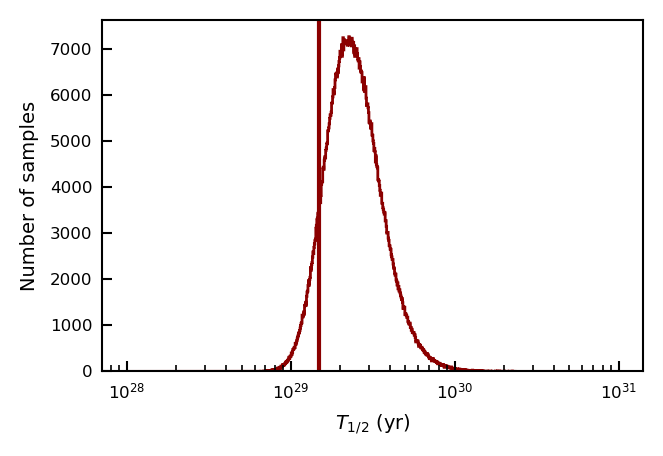

In [36]:
t2_0vbpbp_ibm = sample_halflife_kamland(m0vbb_ibm, g0vbb, m0vbpbp_ibm, g0vbpbp, 1.07e26, R, 1000000)

lowerlimits_ibm=np.quantile(t2_0vbpbp_ibm, [0.1,0.5,0.841])
print(lowerlimits_ibm)
lowerlimit_ibm=np.quantile(t2_0vbpbp_ibm, [0.1])
print('IBM: 90 % lower limit on half-life=', lowerlimit_ibm,'\n')

plot_loghist(t2_0vbpbp_ibm, 1000, (1e28,1e31), color='darkred', histtype='step', label='IBM')
plt.axvline(lowerlimit_ibm, color='darkred')



plt.xlabel('$T_{1/2}$ (yr)')
plt.ylabel('Number of samples')
#plt.yscale('log')
plt.draw()
plt.show()

#### Cross-check with effective neutrino mass limits from KamLand Zen

Our value should be in between.

In [37]:
print('0vECEC')
mnu0165=0.165e-3
t0vecec_ibm=sample_halflife_mnu(me, mnu0165, m0vecec_ibm, g0vecec, R, 1000000)
lowerlimits_ibm=np.quantile(t0vecec_ibm, [0.1])
print(lowerlimits_ibm)

mnu0061=0.061e-3
t0vecec_ibm=sample_halflife_mnu(me, mnu0061, m0vecec_ibm, g0vecec, R, 1000000)
lowerlimits_ibm=np.quantile(t0vecec_ibm, [0.1])
print(lowerlimits_ibm, '\n')

print('0vECb+')
mnu0165=0.165e-3
t0vecbp_ibm=sample_halflife_mnu(me, mnu0165, m0vecbp_ibm, g0vecbp, R, 1000000)
lowerlimits_ibm=np.quantile(t0vecbp_ibm, [0.1])
print(lowerlimits_ibm)

mnu0061=0.061e-3
t0vecbp_ibm=sample_halflife_mnu(me, mnu0061, m0vecbp_ibm, g0vecbp, R, 1000000)
lowerlimits_ibm=np.quantile(t0vecbp_ibm, [0.1])
print(lowerlimits_ibm, '\n')

print('0vECb+')
mnu0165=0.165e-3
t0vbpbp_ibm=sample_halflife_mnu(me, mnu0165, m0vbpbp_ibm, g0vbpbp, R, 1000000)
lowerlimits_ibm=np.quantile(t0vbpbp_ibm, [0.1])
print(lowerlimits_ibm)

mnu0061=0.061e-3
t0vbpbp_ibm=sample_halflife_mnu(me, mnu0061, m0vbpbp_ibm, g0vbpbp, R, 1000000)
lowerlimits_ibm=np.quantile(t0vbpbp_ibm, [0.1])
print(lowerlimits_ibm, '\n')

0vECEC
[1.39979313e+32]
[1.02439181e+33] 

0vECb+
[5.58928475e+27]
[4.08917905e+28] 

0vECb+
[9.88635993e+28]
[7.23586674e+29] 



## Recalculating Tab. 7 in the paper

In [38]:
t2vecbp=ufloat(1.7e23,0.6e23)
t2vecbp_exp=3.3e26

x=t2vecbp_exp/t2vecbp
print(x)

(1.9+/-0.7)e+03


In [39]:
t2vbpbp=ufloat(2.0e28,0.7e28)
t2vbpbp_exp=2.5e26

x=t2vbpbp_exp/t2vbpbp
print(x)

0.013+/-0.004


In [40]:
print(np.divide(2.4e26,(1.8e29,2.1e32)))
print(np.divide(2.9e26,(4.8e25,8.4e27)))
print(np.divide(2.4e26,(8.6e26,1.5e29)))

[1.33333333e-03 1.14285714e-06]
[6.04166667 0.03452381]
[0.27906977 0.0016    ]


## Recalculating Tab. 6 in the paper

In [41]:
def decayrate(halflife, isotope_kg_per_t, m_molar = 124, efficiency=1):
    #halflife in years
    #isotope_kg_per_t in kg/t
    #mmolar in g/mol
    N_A = 6.02214076e23 #mol^(-1)
    return (np.log(2)/halflife) * ((isotope_kg_per_t*1e3)/m_molar) * N_A * efficiency

m_molar_xe124=123.905893003 #g/mol


In [42]:
#0vecec in XENON1T
#decayrate(1.8e22,0.96,m_molar_xe124,0.96)*(177.7/365)*1.5

#2vecb+ for 1 kg/t Xe-124 
# 43 % efficiency scaled from 37 % efficiency using ratio of efficiencies from G3 detector at x-y-z = 10mm
print(decayrate(t2vecbp,10,m_molar_xe124,0.43))

85+/-30


In [43]:
#0vecec in XENON1T
#decayrate(1.8e22,0.96,m_molar_xe124,0.96)*(177.7/365)*1.5

#0vecb+ for 1 kg/t Xe-124 and 37 % efficiency (from Fig. 4 in paper for x-y-z = 10 mm)
#<m_nu> <1.1 eV
print(decayrate(4.8e25,10,m_molar_xe124,0.37))
#KamLand Zen T_1/2 > 1.07*10^26 yr for Xe-136 0vbb
print(decayrate(8.4e27,10,m_molar_xe124,0.37))

0.25968381819828346
0.0014839075325616198


## Remake Fig. 6

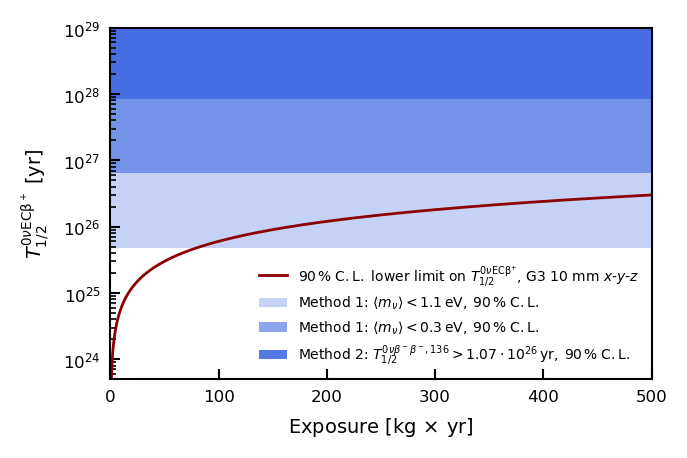

In [44]:
def sensitivity(exposure, isotope_molar_mass, efficiency=1, limit=True, confidence_level=90):
    # exposure in kg x yr of decaying isotope 
    # isotope molar mass in g/mol
    N_A = 6.02214076e23 #mol^(-1)
    if limit==True:
        if confidence_level==90:
            N=2.3
    return np.multiply((np.log(2)*N_A*efficiency*1e3)/(N*isotope_molar_mass), exposure)


exposure=np.arange(0,500)
g3sensitivity_0vecbp=sensitivity(exposure, m_molar_xe124, 0.41, True, 90)

plt.plot(exposure,g3sensitivity_0vecbp, color = "darkred", linewidth = 1, label = "$90\\,\\%\\;\\rm{C.L.}$ lower limit on $T_{1/2}^{0\\nu\\rm{EC}\\beta^{+}}$, G3 10 mm $x$-$y$-$z$", alpha=1)
"""
plt.plot(exposure,half_life_2vbpbp, color = "blue", linewidth = 4, label = "2vB+B+", alpha=1)
plt.axhline(theory_2vbpbp, color = "blue", linestyle = "dashed", linewidth = 4, label = "2vB+B+ theory", alpha=1)
plt.plot(exposure,half_life_0vbpbp, color = "green", linewidth = 4, label = "0vB+B+", alpha=1)
plt.axhline(theory_0vbpbp, color = "green", linestyle = "dashed", linewidth = 4, label = "0vB+B+ theory", alpha=1)
plt.plot(exposure,half_life_0vECEC, color = "gold", linewidth = 4, label = "0vECEC", alpha=1)
plt.axhline(theory_0vECEC, color = "gold", linestyle = "dashed", linewidth = 4, label = "0vB+B+ theory", alpha=1)
"""

plt.axhspan(4.8e25,1e35,facecolor="royalblue",alpha=0.3, edgecolor=None, label = "Method 1: $\\langle m_\\nu\\rangle < 1.1\\,\\rm{eV,}\\; 90\\,\\%\\;\\rm{C.L.}$")
plt.axhspan(6.5e26,1e35,facecolor="royalblue",alpha=0.6, edgecolor=None, label ="Method 1: $\\langle m_\\nu\\rangle < 0.3\\,\\rm{eV, }\\; 90\\,\\%\\;\\rm{C.L.}$")
plt.axhspan(8.4e27,1e35,facecolor="royalblue",alpha=0.9, edgecolor=None, label ="Method 2: $T_{1/2}^{0\\nu\\beta^-\\beta^-,136} > 1.07 \\cdot 10^{26}\,\\rm{yr,}\\; 90\\,\\%\\;\\rm{C.L.}$")



plt.xticks()
plt.yticks()
plt.yscale("log")
plt.ylim(5e23,1e29)
plt.xlim(0,500)
plt.ylabel("$T_{1/2}^{0\\nu\\rm{EC}\\beta^+}$ [yr]")
plt.xlabel("Exposure [kg$\,\\times\,$yr]")
#plt.axhline(1, color="black", linewidth=1,alpha=1)
plt.legend(frameon=False, facecolor='white', edgecolor='white', framealpha=1, loc='lower right')
#plt.savefig("sensitvity2.pdf", format="pdf", dpi=400, figsize=(12,9))
plt.draw()
plt.savefig("sensitvity5.png", format="png", bbox_inches="tight")
plt.savefig("sensitvity5.pdf", format="pdf", bbox_inches="tight")

plt.show()

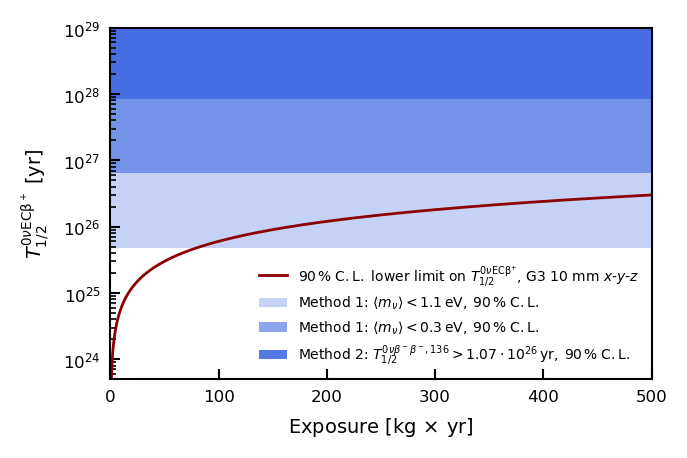

In [45]:
def sensitivity(exposure, isotope_molar_mass, efficiency=1, limit=True, confidence_level=90):
    # exposure in kg x yr of decaying isotope 
    # isotope molar mass in g/mol
    N_A = 6.02214076e23 #mol^(-1)
    if limit==True:
        if confidence_level==90:
            N=2.3
    return np.multiply((np.log(2)*N_A*efficiency*1e3)/(N*isotope_molar_mass), exposure)


exposure=np.arange(0,500)
g3sensitivity_0vecbp=sensitivity(exposure, m_molar_xe124, 0.41, True, 90)

plt.plot(exposure,g3sensitivity_0vecbp, color = "darkred", linewidth = 1, label = "$90\\,\\%\\;\\rm{C.L.}$ lower limit on $T_{1/2}^{0\\nu\\rm{EC}\\beta^{+}}$, G3 10 mm $x$-$y$-$z$", alpha=1)
"""
plt.plot(exposure,half_life_2vbpbp, color = "blue", linewidth = 4, label = "2vB+B+", alpha=1)
plt.axhline(theory_2vbpbp, color = "blue", linestyle = "dashed", linewidth = 4, label = "2vB+B+ theory", alpha=1)
plt.plot(exposure,half_life_0vbpbp, color = "green", linewidth = 4, label = "0vB+B+", alpha=1)
plt.axhline(theory_0vbpbp, color = "green", linestyle = "dashed", linewidth = 4, label = "0vB+B+ theory", alpha=1)
plt.plot(exposure,half_life_0vECEC, color = "gold", linewidth = 4, label = "0vECEC", alpha=1)
plt.axhline(theory_0vECEC, color = "gold", linestyle = "dashed", linewidth = 4, label = "0vB+B+ theory", alpha=1)
"""

plt.axhspan(4.8e25,1e35,facecolor="royalblue",alpha=0.3, edgecolor=None, label = "Method 1: $\\langle m_\\nu\\rangle < 1.1\\,\\rm{eV,}\\; 90\\,\\%\\;\\rm{C.L.}$")
plt.axhspan(6.5e26,1e35,facecolor="royalblue",alpha=0.6, edgecolor=None, label ="Method 1: $\\langle m_\\nu\\rangle < 0.3\\,\\rm{eV, }\\; 90\\,\\%\\;\\rm{C.L.}$")
plt.axhspan(8.4e27,1e35,facecolor="royalblue",alpha=0.9, edgecolor=None, label ="Method 2: $T_{1/2}^{0\\nu\\beta^-\\beta^-,136} > 1.07 \\cdot 10^{26}\,\\rm{yr,}\\; 90\\,\\%\\;\\rm{C.L.}$")



plt.xticks()
plt.yticks()
plt.yscale("log")
plt.ylim(5e23,1e29)
plt.xlim(0,500)
plt.ylabel("$T_{1/2}^{0\\nu\\rm{EC}\\beta^+}$ [yr]")
plt.xlabel("Exposure [kg$\,\\times\,$yr]")
#plt.axhline(1, color="black", linewidth=1,alpha=1)
plt.legend(frameon=False, facecolor='white', edgecolor='white', framealpha=1, loc='lower right')
#plt.savefig("sensitvity2.pdf", format="pdf", dpi=400, figsize=(12,9))
plt.draw()
plt.savefig("sensitvity5.png", format="png", bbox_inches="tight")
plt.savefig("sensitvity5.pdf", format="pdf", bbox_inches="tight")

plt.show()

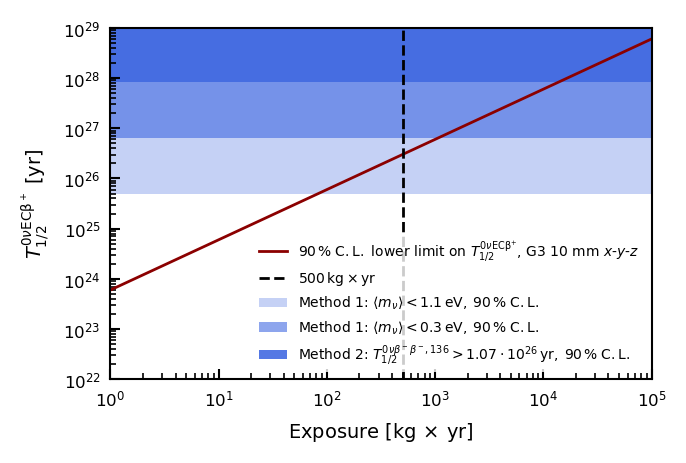

In [55]:
def sensitivity(exposure, isotope_molar_mass, efficiency=1, limit=True, confidence_level=90):
    # exposure in kg x yr of decaying isotope 
    # isotope molar mass in g/mol
    N_A = 6.02214076e23 #mol^(-1)
    if limit==True:
        if confidence_level==90:
            N=2.3
    return np.multiply((np.log(2)*N_A*efficiency*1e3)/(N*isotope_molar_mass), exposure)


exposure=np.arange(0,100000)
g3sensitivity_0vecbp=sensitivity(exposure, m_molar_xe124, 0.41, True, 90)

plt.plot(exposure,g3sensitivity_0vecbp, color = "darkred", linewidth = 1, label = "$90\\,\\%\\;\\rm{C.L.}$ lower limit on $T_{1/2}^{0\\nu\\rm{EC}\\beta^{+}}$, G3 10 mm $x$-$y$-$z$", alpha=1)
"""
plt.plot(exposure,half_life_2vbpbp, color = "blue", linewidth = 4, label = "2vB+B+", alpha=1)
plt.axhline(theory_2vbpbp, color = "blue", linestyle = "dashed", linewidth = 4, label = "2vB+B+ theory", alpha=1)
plt.plot(exposure,half_life_0vbpbp, color = "green", linewidth = 4, label = "0vB+B+", alpha=1)
plt.axhline(theory_0vbpbp, color = "green", linestyle = "dashed", linewidth = 4, label = "0vB+B+ theory", alpha=1)
plt.plot(exposure,half_life_0vECEC, color = "gold", linewidth = 4, label = "0vECEC", alpha=1)
plt.axhline(theory_0vECEC, color = "gold", linestyle = "dashed", linewidth = 4, label = "0vB+B+ theory", alpha=1)
"""

plt.axhspan(4.8e25,1e35,facecolor="royalblue",alpha=0.3, edgecolor=None, label = "Method 1: $\\langle m_\\nu\\rangle < 1.1\\,\\rm{eV,}\\; 90\\,\\%\\;\\rm{C.L.}$")
plt.axhspan(6.5e26,1e35,facecolor="royalblue",alpha=0.6, edgecolor=None, label ="Method 1: $\\langle m_\\nu\\rangle < 0.3\\,\\rm{eV, }\\; 90\\,\\%\\;\\rm{C.L.}$")
plt.axhspan(8.4e27,1e35,facecolor="royalblue",alpha=0.9, edgecolor=None, label ="Method 2: $T_{1/2}^{0\\nu\\beta^-\\beta^-,136} > 1.07 \\cdot 10^{26}\,\\rm{yr,}\\; 90\\,\\%\\;\\rm{C.L.}$")

plt.axvline(500, color='black', linestyle='--', linewidth=1, label='$500\\,\\rm{kg}\\times\\rm{yr}$')

plt.xticks()
plt.yticks()
plt.yscale("log")
plt.xscale('log')
plt.ylim(1e22,1e29)
plt.xlim(1,1e5)
plt.ylabel("$T_{1/2}^{0\\nu\\rm{EC}\\beta^+}$ [yr]")
plt.xlabel("Exposure [kg$\,\\times\,$yr]")
#plt.axhline(1, color="black", linewidth=1,alpha=1)
leg = plt.legend(frameon=True, framealpha=0.8, loc='lower right')
leg.get_frame().set_linewidth(0)
#plt.savefig("sensitvity2.pdf", format="pdf", dpi=400, figsize=(12,9))
plt.draw()
plt.savefig("sensitvity_g3_10mmxyz_larger.png", format="png", bbox_inches="tight")
plt.savefig("sensitvity_g3_10mmxyz_larger.pdf", format="pdf", bbox_inches="tight")

plt.show()